In [2]:
!wget https://ti.arc.nasa.gov/m/project/autoclass/autoclass-c-3-3-6.tar.gz

--2020-04-09 22:25:13--  https://ti.arc.nasa.gov/m/project/autoclass/autoclass-c-3-3-6.tar.gz
Resolving ti.arc.nasa.gov (ti.arc.nasa.gov)... 2001:4d0:6311:2227:14b6:372b:2078:2a94, 128.102.105.66
Connecting to ti.arc.nasa.gov (ti.arc.nasa.gov)|2001:4d0:6311:2227:14b6:372b:2078:2a94|:443... failed: Connection timed out.
Connecting to ti.arc.nasa.gov (ti.arc.nasa.gov)|128.102.105.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2234023 (2.1M) [application/x-tar]
Saving to: ‘autoclass-c-3-3-6.tar.gz’

autoclass-c-3-3-6.t 100%[===================>]   2.13M   358KB/s    in 6.1s    

2020-04-09 22:27:31 (358 KB/s) - ‘autoclass-c-3-3-6.tar.gz’ saved [2234023/2234023]



In [3]:
!tar zxvf autoclass-c-3-3-6.tar.gz
!rm -f autoclass-c-3-3-6.tar.gz
!export PATH=$PATH:$(pwd)/autoclass-c

autoclass-c/
autoclass-c/prog/
autoclass-c/prog/autoclass.make.linux.gcc
autoclass-c/prog/predictions.o
autoclass-c/prog/utils.c.~3~
autoclass-c/prog/model-single-normal-cn.c.~3~
autoclass-c/prog/search-converge.c.~1~
autoclass-c/prog/model-expander-3.c.~2~
autoclass-c/prog/struct-data.o
autoclass-c/prog/model-single-normal-cm.o
autoclass-c/prog/model-expander-3.c
autoclass-c/prog/predictions.c
autoclass-c/prog/model-single-normal-cm.c.~1~
autoclass-c/prog/model-single-multinomial.o
autoclass-c/prog/struct-clsf.c.~1~
autoclass-c/prog/intf-influence-values.o
autoclass-c/prog/init.o
autoclass-c/prog/utils-math.o
autoclass-c/prog/model-single-normal-cm.c.~2~
autoclass-c/prog/io-read-data.c.~2~
autoclass-c/prog/io-read-data.o
autoclass-c/prog/globals.h.~1~
autoclass-c/prog/getparams.c.~1~
autoclass-c/prog/model-single-multinomial.c
autoclass-c/prog/struct-model.o
autoclass-c/prog/struct-class.o
autoclass-c/prog/model-transforms.c
autoclass-c/prog/search-basic.o
autoclass-c/prog/autoclass.m

In [4]:
!export PATH=$PATH:$(pwd)/autoclass-c

In [1]:
from pathlib import Path
import sys
import time

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd

%matplotlib inline

print("Python:", sys.version)
print("matplotlib:", matplotlib.__version__)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)

import autoclasswrapper as wrapper
print("AutoClassWrapper:", wrapper.__version__)

version = sys.version_info
if not ((version.major >= 3) and (version.minor >= 6)):
    sys.exit("Need Python>=3.6")

Python: 3.7.5 (default, Nov 20 2019, 09:21:52) 
[GCC 9.2.1 20191008]
matplotlib: 3.2.1
numpy: 1.18.2
pandas: 1.0.3
AutoClassWrapper: 1.5.1


In [2]:
size = 100
sigma = 0.6
x = np.concatenate((np.random.normal(3, sigma, size), np.random.normal(4, sigma, size), np.random.normal(6, sigma, size)))
y = np.concatenate((np.random.normal(4, sigma, size), np.random.normal(0, sigma, size), np.random.normal(5, sigma, size)))
color = ["blue"]*size+["orange"]*size+["purple"]*size
name = ["id{:03d}".format(id) for id in range(size*3)]
df = pd.DataFrame.from_dict({"x":x, "y":y, "color":color})
df.index = name
df.index.name = "name"
df.head()

,x,y,color
name,,,
id000,3.486154,3.072117,blue
id001,3.468318,2.813905,blue
id002,3.212106,4.300430,blue
id003,4.602391,3.526602,blue
id004,3.067288,4.178684,blue


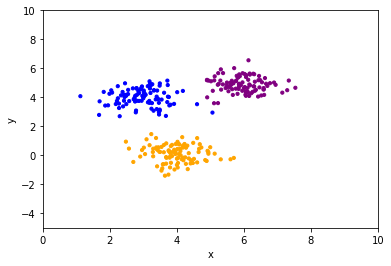

In [4]:

plt.scatter(df["x"], df["y"], color=df["color"], s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 10)
plt.ylim(-5, 10);

In [5]:
# verify all x are > 0
assert min(df["x"]) > 0

In [6]:
df["x"].to_csv("demo_real_scalar.tsv", sep="\t", header=True)
df["y"].to_csv("demo_real_location.tsv", sep="\t", header=True)

In [7]:
# Create object to prepare dataset.
clust = wrapper.Input()

# Load datasets from tsv files.
clust.add_input_data("demo_real_scalar.tsv", "real scalar")
clust.add_input_data("demo_real_location.tsv", "real location")

# Prepare input data:
# - create a final dataframe
# - merge datasets if multiple inputs
clust.prepare_input_data()

# Create files needed by AutoClass.
clust.create_db2_file()
clust.create_hd2_file()
clust.create_model_file()
clust.create_sparams_file()
clust.create_rparams_file()

2020-04-10 13:11:00 INFO     Reading data file 'demo_real_scalar.tsv' as 'real scalar' with error 0.01
2020-04-10 13:11:00 INFO     Detected encoding: ascii
2020-04-10 13:11:00 INFO     Found 300 rows and 2 columns
2020-04-10 13:11:00 DEBUG    Checking column names
2020-04-10 13:11:00 DEBUG    Index name 'name'
2020-04-10 13:11:00 DEBUG    Column name 'x'
2020-04-10 13:11:00 INFO     Checking data format
2020-04-10 13:11:00 INFO     Column 'x'
2020-04-10 13:11:00 INFO     count    300.000000
2020-04-10 13:11:00 INFO     mean       4.297838
2020-04-10 13:11:00 INFO     std        1.387917
2020-04-10 13:11:00 INFO     min        1.117788
2020-04-10 13:11:00 INFO     50%        4.006150
2020-04-10 13:11:00 INFO     max        7.539236
2020-04-10 13:11:00 INFO     ---
2020-04-10 13:11:00 INFO     Reading data file 'demo_real_location.tsv' as 'real location' with error 0.01
2020-04-10 13:11:00 INFO     Detected encoding: ascii
2020-04-10 13:11:00 INFO     Found 300 rows and 2 columns
2020-0

In [8]:

# Clean previous status file and results if a classification has already been performed.
!rm -f autoclass-run-* *.results-bin

# Search autoclass in path.
wrapper.search_autoclass_in_path()

# Create object to run AutoClass.
run = wrapper.Run()

# Prepare run script.
run.create_run_file()

# Run AutoClass.
run.run()

2020-04-10 13:11:04 INFO     AutoClass C executable found in /home/chuongdv/Documents/SourceCode/MachineLearning/autoclass-c/autoclass
2020-04-10 13:11:04 INFO     Writing run file
2020-04-10 13:11:04 INFO     AutoClass C executable found in /home/chuongdv/Documents/SourceCode/MachineLearning/autoclass-c/autoclass
2020-04-10 13:11:04 INFO     AutoClass C version: AUTOCLASS C (version 3.3.6unx)
2020-04-10 13:11:04 INFO     Running clustering...


2020-04-10 13:11:37 INFO     Extracting autoclass results
2020-04-10 13:11:37 INFO     Found 300 cases classified in 3 classes
2020-04-10 13:11:37 INFO     Aggregating input data
2020-04-10 13:11:37 INFO     Writing classes + probabilities .tsv file
2020-04-10 13:11:37 INFO     Writing .cdt file
2020-04-10 13:11:37 INFO     Writing .cdt file (with probabilities)
2020-04-10 13:11:37 INFO     Writing class statistics
2020-04-10 13:11:37 INFO     Writing dendrogram


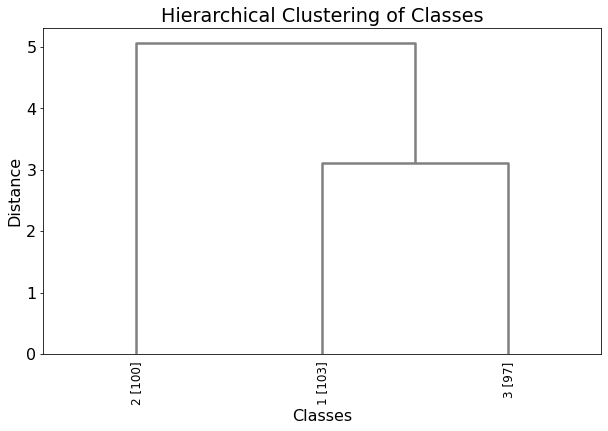

In [9]:
timer = 0
step = 2
while not Path("autoclass-run-success").exists():
    timer += step
    sys.stdout.write("\r")
    sys.stdout.write(f"Time: {timer} sec.")
    sys.stdout.flush()
    time.sleep(step)

results = wrapper.Output()
results.extract_results()
results.aggregate_input_data()
results.write_cdt()
results.write_cdt(with_proba=True)
results.write_class_stats()
results.write_dendrogram()